In [2]:
from os import path, walk
from image_metadata_extraction import extract_all_metadata, decode_gps_data
from config import IMAGES_DIR, CURRENT_DIRECTORY, DEFAULT_DUMP_FILENAME
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

mapbox_api_key = "https://api.mapbox.com/styles/v1/enzewon/cl06qvw9p001a14nyw27siigg/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiZW56ZXdvbiIsImEiOiJjbDA2cXRlMGIwMDVhM2xxcDd6ZWlvM2RpIn0.F6aDNRNLLzt0F_hm4dnpzw"



In [3]:

def get_all_needed_data(directory_path=IMAGES_DIR):
    files_in_images = []
    for _, _, files in walk(path.join(directory_path)):
        files_in_images = files
    files_in_images = list(filter(lambda x: "jpg" in x, files_in_images))

    all_data = pd.DataFrame()
    for i in range(len(files_in_images)):
        filename = files_in_images[i]
        metadata = extract_all_metadata(path.join(directory_path, filename))
        gps_data = decode_gps_data(metadata)
        if not gps_data:
            continue

        data = pd.DataFrame(gps_data, index=[filename])
        for key in metadata.keys():
            if key != "GPSInfo":
                data[key] = metadata[key]
        all_data = pd.concat([all_data, data])

    return all_data

def load_data(dirpath=CURRENT_DIRECTORY, filename=DEFAULT_DUMP_FILENAME):
    return pd.read_excel(path.join(CURRENT_DIRECTORY, filename))

def dump_data(all_data, dirpath=CURRENT_DIRECTORY, filename=DEFAULT_DUMP_FILENAME):
    all_data.to_excel(path.join(CURRENT_DIRECTORY, filename))


In [4]:
dump_data(get_all_needed_data())

ymax = 48.17446797
ymin = 48.13511797
xmax = 24.90595
xmin = 24.886863
     latitude  longitude
78   1.000000   0.169427
105  1.000000   0.169427
122  1.000000   0.169427
12   1.000000   0.169427
37   1.000000   0.169427
..        ...        ...
98   0.373292   0.017281
112  0.357790   0.006861
68   0.358298   0.000000
57   0.993698   0.165032
119  0.993698   0.165032

[126 rows x 2 columns]


/tmp/ipykernel_64942/1845563441.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_64942/1845563441.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_64942/1845563441.py:22: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



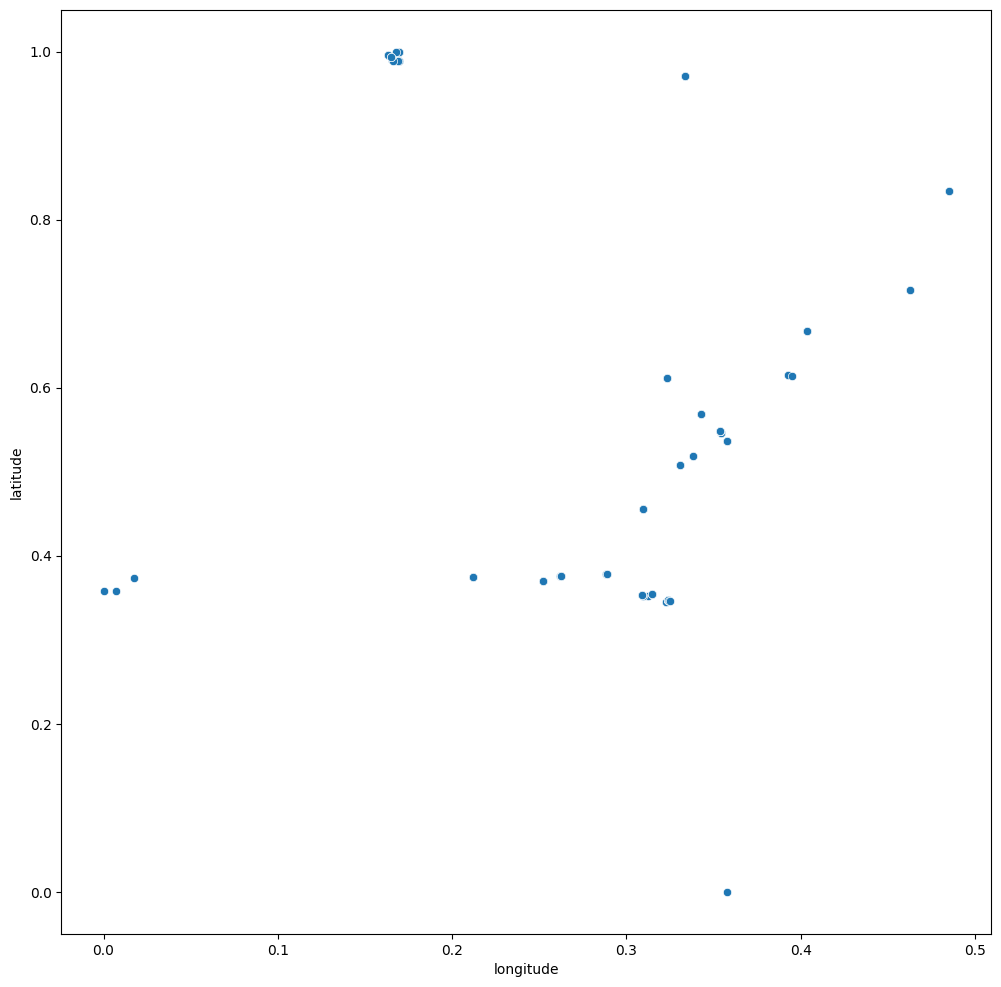

In [14]:

all_data = load_data()
all_data = all_data.sort_values(by="DateTimeOriginal")
y_x = all_data[["latitude", "longitude"]]
ymax = max(y_x["latitude"])
ymin = min(y_x["latitude"])
xmax = max(y_x["longitude"])
xmin = min(y_x["longitude"])
print(f"ymax = {ymax}")
print(f"ymin = {ymin}")
print(f"xmax = {xmax}")
print(f"xmin = {xmin}")
yrange = ymax - ymin
xrange = xmax - xmin
biggest_range_y = yrange > xrange
norm_y = list(map(lambda y:round((y - ymin)/yrange, 6),y_x['latitude']))
norm_x = list(map(lambda x:round((x - xmin)/yrange, 6),y_x['longitude']))
y_x['latitude'] = norm_y
y_x['longitude'] = norm_x
print(y_x)
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data = y_x, x='longitude', y='latitude', ax=ax)
fig.show()


In [20]:
f = px.line_mapbox(all_data[["latitude", "longitude", "DateTimeOriginal"]], lat="latitude", lon="longitude", zoom=12, height=800)


In [21]:
f.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=10, mapbox_center_lat = ymin,mapbox_center_lon=xmin,
    margin={"r":0,"t":0,"l":0,"b":0})